In [1]:
print('test')

test


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

import sys
sys.path.append(r'C:\Users\jeanb\Documents\Suisse\Job Search\Mondelez International\Market Analyst\Technical Interview Preparation Data')

### Data

In [2]:
#Read the data in the relevant Excel sheet
df = pd.read_excel(io='fao-dariy-price-indices-oct.xlsx', sheet_name='Dairy Price Index', skiprows=4) #data starts row 5
#Clean the data --> drop rows with NA values
df = df.dropna(axis='rows')
#Rename the columns
df.columns = ['Date', 'Dairy Price Index', 'Butter Index', 'SMP Index', 'WMP Index', 'Cheese Index', 'Wheat Price', 'Corn Price', 'PPI Processed food from Cacao']
df.tail()

,Date,Dairy Price Index,Butter Index,SMP Index,WMP Index,Cheese Index,Wheat Price,Corn Price,PPI Processed food from Cacao
420,2025-02-01,147.687011,201.013020,106.679488,142.867800,147.531714,190.102642,221.254544,713.341
421,2025-03-01,148.736780,212.343462,108.283922,143.425443,146.081283,179.606542,207.751691,718.920
422,2025-04-01,151.721707,218.010960,110.135632,147.062778,148.495737,174.816743,215.569093,845.535
423,2025-05-01,153.626094,218.967925,110.161713,153.180885,149.698095,196.841071,204.808448,803.549
424,2025-06-01,155.504596,226.182527,109.856405,149.584970,152.751448,173.194763,195.719077,793.849


In [3]:
#We split the data into the one that will train the model (67%) and the one upon which the model will be tested upon (33%)
def split_data(data: pd.DataFrame):
    data = data.copy()

    X_train = data[['Wheat Price', 'Corn Price', 'PPI Processed food from Cacao']]
    y_train = data['Dairy Price Index']
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

    return X_train, y_train

In [4]:
X_train, y_train = split_data(df)
X_train = X_train.values
y_train = y_train.values

#Normalizing the data
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

X_train = (X_train - X_mean) / X_std
y_train = (y_train - y_mean) / y_std
print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])
print("Type of y_train:",type(y_train))

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [[-0.20778785 -0.8361379  -0.94876263]
 [-0.25849044 -0.79539461 -0.93611355]
 [-0.22468866 -0.69580014 -0.90736564]
 [-0.3429948  -0.6641112  -0.90851555]
 [-0.49932771 -0.67769206 -0.92461438]]
Type of y_train: <class 'numpy.ndarray'>


### Cost computation and Gradient Descent

In [ ]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for multiple linear regression.
    """
    m = X.shape[0]
    total_cost = 0.0
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        total_cost += (f_wb - y[i])**2

    total_cost = total_cost / (2 * m)
    return total_cost

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for multiple linear regression.
    """
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0.0
    
    for i in range(m):
        f_wb = np.dot(X[i], w) + b
        err = f_wb - y[i]
        dj_db += err
        dj_dw += err * X[i]
    
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [13]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent for multiple linear regression.
    """
    J_history = []
    w_history = []
    
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i < 100000:
            cost = cost_function(X, y, w, b)
            J_history.append(cost)
        
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w.copy())
            print(f"Iteration {i:4}: Cost {J_history[-1]:8.4f}")
            
    return w, b, J_history, w_history



In [14]:
# Initialize parameters
w_init = np.zeros(X_train.shape[1])
b_init = 0
alpha = 1e-3
iterations = 10000

# Run gradient descent
w_final, b_final, J_history, w_history = gradient_descent(
    X_train, y_train, w_init, b_init,
    compute_cost, compute_gradient,
    alpha, iterations
)

print(f"\nFinal parameters:\n w = {w_final}\n b = {b_final}\nFinal cost = {J_history[-1]:.4f}")

Iteration    0: Cost   0.4985
Iteration 1000: Cost   0.1234
Iteration 2000: Cost   0.1073
Iteration 3000: Cost   0.1050
Iteration 4000: Cost   0.1044
Iteration 5000: Cost   0.1043
Iteration 6000: Cost   0.1042
Iteration 7000: Cost   0.1042
Iteration 8000: Cost   0.1041
Iteration 9000: Cost   0.1041

Final parameters:
 w = [0.51046004 0.39472293 0.27414142]
 b = 0.012131592211134497
Final cost = 0.1041


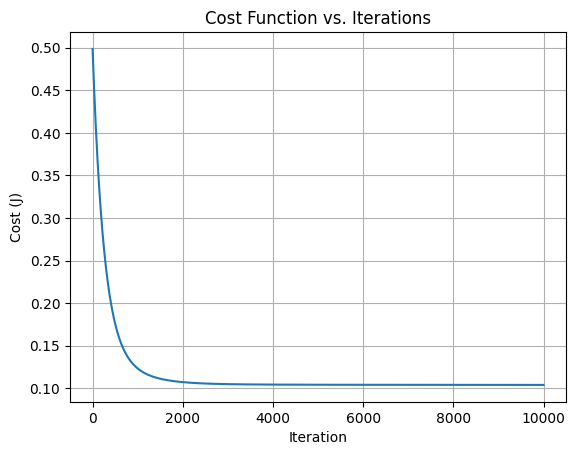

In [15]:
#Cost evolution
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (J)')
plt.title('Cost Function vs. Iterations')
plt.grid(True)
plt.show()

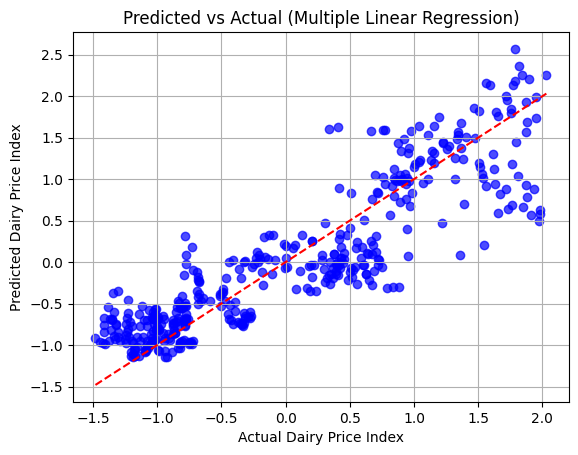

In [16]:
#Predicted VS Actual
y_pred = np.dot(X_train, w_final) + b_final

plt.scatter(y_train, y_pred, color='blue', alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Dairy Price Index')
plt.ylabel('Predicted Dairy Price Index')
plt.title('Predicted vs Actual (Multiple Linear Regression)')
plt.grid(True)
plt.show()

### Veryfing the regression goodness

In [19]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     535.8
Date:                Mon, 03 Nov 2025   Prob (F-statistic):          2.64e-143
Time:                        10:54:11   Log-Likelihood:                -268.92
No. Observations:                 425   AIC:                             545.8
Df Residuals:                     421   BIC:                             562.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0081      0.029     -0.280      0.7

- The R square means that the model explains 79.2% of the variance in the Dairy Price Index.

- A p_value close to 0 means that the regression is significant.

- The Durbin Watson test, being at 0.108, means there's a high autocorrelation between the variables

- The Jarque Berra check for the normality of the data, and the p_value being inferior to 5%, we assume it is normal

- The skew represents the symetry of the curve. It can be more to the left of right. Usual skew is around 0.

- The kurtosis represents the thickness of the curve above 0 and its 'flatness distribution'. More flat = more kurtosis. A usual kurtosis is around 3.



In [22]:
y_pred = model.predict(X)
print(f"R²: {r2_score(y_train, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred):.4f}")
print(f"RMSE: {mean_squared_error(y_train, y_pred):.4f}")

R²: 0.7924
MAE: 0.3591
RMSE: 0.2076
